# <p style="text-align: center;">MIS 382N: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 80 </p>
## <p style="text-align: center;">Due: Mon, October 24, by 11:59pm</p>
### <p style="text-align: center;">Nikita Lakhotia, Stuti Madaan </P>


Your homework should be written in a **Jupyter notebook**. Please submit **only one** ipynb file from each group, and include the names of all the group members. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

In [244]:
path="/Users/nikitalakhotia/Desktop/msba docs/Advanced predictive modeling/HW3/"
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import sklearn 
from scipy.stats import skew
from sklearn.linear_model import RidgeCV, ElasticNetCV, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import linear_model 
import random
from sklearn import preprocessing
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import math
from ggplot import *
%matplotlib inline 

# Question 1 - Stochastic Gradient Descent (10pts)

### Part 1 ###
**Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1*x_1 + w_2*x_1^2 + w_3*x_2 $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, submit that as a separate file and make a reference to it in your notebook or include the image in your notebook.**




**Cost Function:** $$J(w) = (t_n - y_n)^2$$

Where, $$y_n = y = w_0 + w_1*x_1 + w_2*x_1^2 + w_3*x_2 $$

is the predicted value of y and $t_n$ = actual value of y

Thus, taking partial derivative of the cost function with respect to any coefficient $w_j$:

$$\frac{\partial J(w)}{\partial w_j} = 2(t_n - y_n) * \frac{\partial (t_n - y_n)}{\partial w_j} = - 2(t_n - y_n) * x_j$$

**Updating Coefficients: **

$$ w_j = w_j - \eta * \frac{\partial J(w)}{\partial w_j} $$

For $w_0$, $x_j$ = 1 

$w_0 = w_0 + 2\eta * (t_n - y_n)$

For $w_1$, $x_j$ = $x_1$  

$w_1 = w_1 + 2\eta * (t_n - y_n) * x_1$ 

For $w_2$, $x_j$ = $x_1^2$  

$w_2 = w_2 + 2\eta * (t_n - y_n) * x_1^2$

For $w_3$, $x_j$ = $x_2$  

$w_3 = w_3 + 2\eta * (t_n - y_n) * x_2$

### Part 2 ###

**Write Python code for an SGD solution to the non-linear model $$ y = w_0 + w_1*x_1 + w_2*x_1^2 + w_3*x_2$$ Try to format similarly to scikit-learn's models. There should be a _fit_ function that takes parameters X, y, learning rate, and number of iterations, and a _predict_ function that takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 10 epochs, using learning rates: [.0001, .001, .01] . Plot MSE and the $w$ parameters as a function of epoch count.**

In [228]:
alphas = [0.0001,0.001,0.01]
epochs = 10 
iterations = 10
samples = pd.read_csv(path+"samples.csv")
samples["x1_squared"] = samples['x1']*samples['x1']
y  = pd.DataFrame(samples['y'])
X_read = samples[['x1','x1_squared','x2']]
X_scaled = pd.DataFrame(data=preprocessing.scale(X_read),columns = ['x1','x1_squared','x2'])

In [229]:
def sgd_fit(X,y,alpha,i):
    w0=[0]*len(alpha)
    w1=[0]*len(alpha)
    w2=[0]*len(alpha)
    w3=[0]*len(alpha)
    for i in range(0,len(alpha)):
        for j in range(1,i+1):
            chosen_x = X.ix[random.randint(0, len(X)-1)]
            chosen_y = y.ix[random.randint(0, len(X)-1)]
            w0[i] = w0[i] + (2*alpha[i]*(chosen_y["y"] - w0[i] - w1[i]*chosen_x["x1"] - w2[i]*(chosen_x["x1_squared"]) - w3[i]*chosen_x["x2"]))
            w1[i]= (w1[i] + (2*alpha[i]*(chosen_y["y"] - w0[i] - w1[i]*chosen_x["x1"] - w2[i]*(chosen_x["x1_squared"]) - w3[i]*chosen_x["x2"]))) * chosen_x["x1"]
            w2[i]= (w2[i] + (2*alpha[i]*(chosen_y["y"] - w0[i] - w1[i]*chosen_x["x1"] - w2[i]*(chosen_x["x1_squared"]) - w3[i]*chosen_x["x2"]))) * chosen_x["x1_squared"]
            w3[i] =(w3[i] + (2*alpha[i]*(chosen_y["y"] - w0[i] - w1[i]*chosen_x["x1"] - w2[i]*(chosen_x["x1_squared"]) - w3[i]*chosen_x["x2"]))) * chosen_x["x2"]
    return [w0,w1,w2,w3]
       
def predict_fn(X,coef):
    predictions1 = []
    predictions2 = []
    predictions3 = []
    for i in range(len(X)):
        predictions1.append(coef[0][0] + coef[1][0]*X["x1"].ix[i] + coef[2][0]*X["x1_squared"].ix[i] + coef[3][0]*X["x2"].ix[i])
        predictions2.append(coef[0][1] + coef[1][1]*X["x1"].ix[i] + coef[2][1]*X["x1_squared"].ix[i] + coef[3][1]*X["x2"].ix[i])
        predictions3.append(coef[0][2] + coef[1][2]*X["x1"].ix[i] + coef[2][2]*X["x1_squared"].ix[i] + coef[3][2]*X["x2"].ix[i])
    return [predictions1,predictions2,predictions3]

def mse(y,predictions_list):
    actual = np.array(y["y"])
    mean_sq1=0.0
    mean_sq2=0.0
    mean_sq3=0.0
    mean_sq1 = np.mean(np.square((predictions_list[0] - actual)))
    mean_sq2 = np.mean(np.square((predictions_list[1] - actual)))
    mean_sq3 = np.mean(np.square((predictions_list[2] - actual)))
    return [mean_sq1,mean_sq2,mean_sq3]

In [230]:
w0=[]
w1=[]
w2=[]
w3=[]
mse_out=[]
for i in range(0,epochs):
    coef = sgd_fit(X_scaled,y,alphas,iterations)
    w0.append(coef[0])
    w1.append(coef[1])
    w2.append(coef[2])
    w3.append(coef[3])
    predictions = predict_fn(X_scaled, coef)
    mse_out.append(mse(y,predictions))

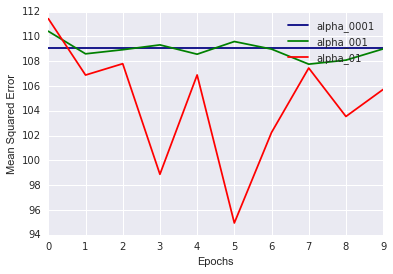

In [231]:
y=[]
y1=[]
y2=[]
for i in mse_out :
    y.append(i[0])
    y1.append(i[1])
    y2.append(i[2])
x=range(1,11)

plt.ylabel("Mean Squared Error")
plt.xlabel("Epochs")

alpha_0001, = plt.plot(y, label='alpha_0001',color='navy')
alpha_001, = plt.plot(y1, label='alpha_001',color ='green')
alpha_01, = plt.plot(y2, label='alpha_01',color ='red')
plt.legend(handles=[alpha_0001,alpha_001,alpha_01])

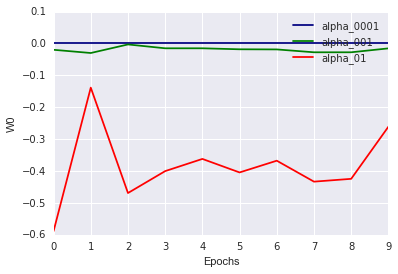

In [232]:
y=[]
y1=[]
y2=[]
for i in w0 :
    y.append(i[0])
    y1.append(i[1])
    y2.append(i[2])
x=range(1,11)

plt.ylabel("W0")
plt.xlabel("Epochs")

alpha_0001, = plt.plot(y, label='alpha_0001',color='navy')
alpha_001, = plt.plot(y1, label='alpha_001',color ='green')
alpha_01, = plt.plot(y2, label='alpha_01',color ='red')
plt.legend(handles=[alpha_0001,alpha_001,alpha_01])

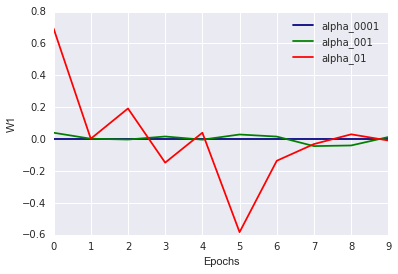

In [233]:
y=[]
y1=[]
y2=[]
for i in w1 :
    y.append(i[0])
    y1.append(i[1])
    y2.append(i[2])
x=range(1,11)

plt.ylabel("W1")
plt.xlabel("Epochs")

alpha_0001, = plt.plot(y, label='alpha_0001',color='navy')
alpha_001, = plt.plot(y1, label='alpha_001',color ='green')
alpha_01, = plt.plot(y2, label='alpha_01',color ='red')
plt.legend(handles=[alpha_0001,alpha_001,alpha_01])

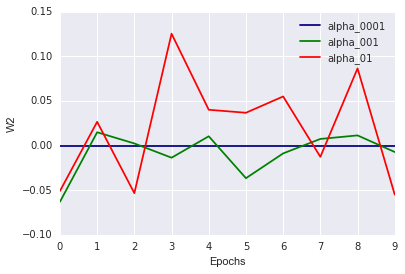

In [234]:
y=[]
y1=[]
y2=[]
for i in w2 :
    y.append(i[0])
    y1.append(i[1])
    y2.append(i[2])
x=range(1,11)

plt.ylabel("W2")
plt.xlabel("Epochs")

alpha_0001, = plt.plot(y, label='alpha_0001',color='navy')
alpha_001, = plt.plot(y1, label='alpha_001',color ='green')
alpha_01, = plt.plot(y2, label='alpha_01',color ='red')
plt.legend(handles=[alpha_0001,alpha_001,alpha_01])

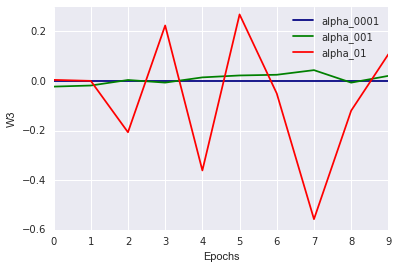

In [235]:
y=[]
y1=[]
y2=[]
for i in w3 :
    y.append(i[0])
    y1.append(i[1])
    y2.append(i[2])
x=range(1,11)

plt.ylabel("W3")
plt.xlabel("Epochs")

alpha_0001, = plt.plot(y, label='alpha_0001',color='navy')
alpha_001, = plt.plot(y1, label='alpha_001',color ='green')
alpha_01, = plt.plot(y2, label='alpha_01',color ='red')
plt.legend(handles=[alpha_0001,alpha_001,alpha_01])

# Question 2: Gradient Descent (5 pts)

Suppose we are trying to use gradient descent to minimize a cost function y = f(w) as shown in the figure below. This function is linearly decreasing between A and B, constant between B and C, quadratic between C and D and constant between D and E. Assume that we have 10000 data points in our training set. If we choose the starting point between B and C, will we be able to find the local minima? Explain your answer. If your answer is "Yes", can you give a bound on the number of iterations required to get to the local minima?



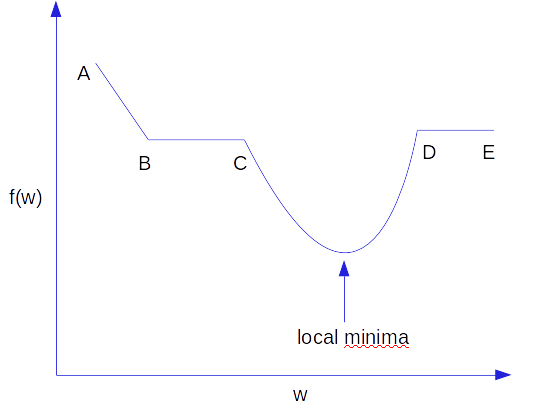

In [246]:
Image(filename=path+'sgd.png')

If we start between B and C, differential of the cost function will be zero and the coefficients will never change their values. So, gradient descent will stay between B and C considering it as the local minima.  Since gradient descent finds only a local minima, it will consider the 'plateau' between B and C as a local minima and no further iterations will take place for gradient descent algorithm because of zero slope. 

However, if we wish to reach to the local minima as shown in the figure above, we can try running gradient descent with different initial points and pick the minimum of all the local minimas that we get. 

Another way is to use the concept of 'mini batches' which will make the gradient descent algorithm stochastic in nature and thus, the algorithm might jump out of this flat region. One more way could be to use the concept of 'momentum', which resembles a ball rolling down the hill, and if we choose a different starting point, we might be able to jump over this flat surface between B and C and reach the minimum point. However, we need to carefully select the step size to be able to jump out of the flat region (B-C or D-E) and not to jump out of the local minima (if reached).

# Question 3: Multi-layer Perceptron regressor (15 points)

In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python. We will use the same dataset used in HW2 Q5: Hitters.csv [here](https://rdrr.io/cran/ISLR/man/Hitters.html). 

Following code will load and split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 42** and **test_size = 0.33**:

In [238]:
data = pd.read_csv(path+'Hitters.csv')
label_name = 'Salary'
y = data[label_name]
X = data.drop(label_name,axis=1)
print X.shape

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

(263, 16)


One more thing to use in this problem is [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on original data, use StandardScaler to make each feature centered ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Whenever you have training and test data, fit a scaler on training data and use this scaler on test data. Here, scale only features (independent variables), not target variable y.

1) Use [sklearn.neural_nework.MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) to do a 5-fold cross validation using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). The cross validation must be performed on the **training data**. Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=40, learning_rate_init = 0.001
    
Now, consider two different settings for the number of hidden units:
    
   (a) *hidden_layer_sizes = (2,)* (b) *hidden_layer_sizes = (15,)*
    
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model: (a) and (b) (6pts)
   
   

In [239]:
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

x_train = pd.DataFrame(X_train_scaled, index = X_train.index, columns = X_train.columns)
x_test = pd.DataFrame(X_test_scaled, index = X_test.index, columns = X_test.columns)

k = KFold(n_splits=5)
X=x_train.merge(pd.DataFrame(y_train),left_index=True,right_index=True)

mlp_fit = sklearn.neural_network.MLPRegressor(hidden_layer_sizes= (2,),activation='tanh',solver='sgd',learning_rate='constant',random_state=42,batch_size=40,learning_rate_init = 0.001)
val_scores=[]
for train,test in k.split(X):
    mlp_fit.fit(x_train.iloc[train],pd.DataFrame(y_train).iloc[train])
    mlp_fit_pred = mlp_fit.predict(x_train.iloc[test])
    val_scores.append(math.sqrt((sklearn.metrics.mean_squared_error(pd.DataFrame(y_train).iloc[test].values,mlp_fit_pred))))
alpha_scores_dict=np.mean(val_scores)
print "RMSE(activation =2) : " + str(alpha_scores_dict)

/Users/nikitalakhotia/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE(activation =2) : 392.181373025


In [240]:
mlp_fit = sklearn.neural_network.MLPRegressor(hidden_layer_sizes= (15,),activation='tanh',solver='sgd',learning_rate='constant',random_state=42,batch_size=40,learning_rate_init = 0.001)
val_scores=[]
for train,test in k.split(X):
    mlp_fit.fit(x_train.iloc[train],pd.DataFrame(y_train).iloc[train])
    mlp_fit_pred = mlp_fit.predict(x_train.iloc[test])
    val_scores.append(math.sqrt((sklearn.metrics.mean_squared_error(pd.DataFrame(y_train).iloc[test].values,mlp_fit_pred))))
alpha_scores_dict=np.mean(val_scores)
print "RMSE(activation = 15): " +str(alpha_scores_dict)

RMSE(activation = 15): 316.484181525


In [241]:
mlp_fit = sklearn.neural_network.MLPRegressor(hidden_layer_sizes= (2,),activation='tanh',solver='sgd',
                                              learning_rate='constant',
                                              random_state=42,batch_size=40,learning_rate_init = 0.001)
mlp_fit.fit(x_train,y_train)
mlp_fit_pred = mlp_fit.predict(x_train)
print "Error on train with activation =2: "+ str(math.sqrt(np.mean((y_train - mlp_fit_pred)**2)))


Error on train with activation =2: 353.802919864


2) Now, using the same parameters used in part 1), train MLPRegressor models on whole training data and report RMSE score for both Train and Test set (Again, use StandardScaler). Which model works better, (a) or (b)? Briefly analyze the result in terms of the number of hidden units. (5pts)




In [242]:
mlp_fit = sklearn.neural_network.MLPRegressor(hidden_layer_sizes= (2,),activation='tanh',solver='sgd',
                                              learning_rate='constant',
                                              random_state=42,batch_size=40,learning_rate_init = 0.001)
mlp_fit.fit(x_train,pd.DataFrame(y_train))
mlp_fit_pred = mlp_fit.predict(x_train)
print "Error on train with activation =2: "+ str(math.sqrt(np.mean((y_train - mlp_fit_pred)**2)))
mlp_fit_pred = mlp_fit.predict(x_test)
print "Error on test with activation =2: "+ str(math.sqrt(np.mean((y_test - mlp_fit_pred)**2)))

mlp_fit = sklearn.neural_network.MLPRegressor(hidden_layer_sizes= (15,),activation='tanh',solver='sgd',
                                              learning_rate='constant',random_state=42,batch_size=40,
                                              learning_rate_init = 0.001)
mlp_fit.fit(x_train,pd.DataFrame(y_train))
mlp_fit_pred = mlp_fit.predict(x_train)
print "Error on train with activation =15: "+ str(math.sqrt(np.mean((y_train - mlp_fit_pred)**2)))

mlp_fit_pred = mlp_fit.predict(x_test)
print "Error on test with activation =15: "+ str(math.sqrt(np.mean((y_test - mlp_fit_pred)**2)))

Error on train with activation =2: 353.802919864
Error on test with activation =2: 489.206156224
Error on train with activation =15: 294.329544051
Error on test with activation =15: 415.025680019



3) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each iteration. For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot two curves for model (a) and (b) in one figure, where *X-axis* is iteration number and *Y-axis* is squared root of *loss\_curve\_* value. (4pts)

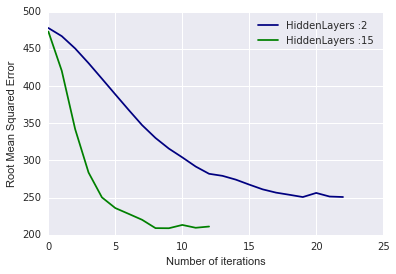

In [243]:
mlp_fit = sklearn.neural_network.MLPRegressor(hidden_layer_sizes= (2,),activation='tanh',solver='sgd',learning_rate='constant',random_state=42,batch_size=40,learning_rate_init = 0.001)
mlp_fit.fit(x_train,pd.DataFrame(y_train))
mlp_fit_pred = mlp_fit.predict(x_test)
k=len(mlp_fit.loss_curve_)

RMSE=[]
for i in mlp_fit.loss_curve_:
    RMSE.append(math.sqrt(i))
    
    
mlp_fit = sklearn.neural_network.MLPRegressor(hidden_layer_sizes= (15,),activation='tanh',solver='sgd',learning_rate='constant',random_state=42,batch_size=40,learning_rate_init = 0.001)
mlp_fit.fit(x_train,pd.DataFrame(y_train))
mlp_fit_pred = mlp_fit.predict(x_test)
k=len(mlp_fit.loss_curve_)

RMSE1=[]
for i in mlp_fit.loss_curve_:
    RMSE1.append(math.sqrt(i))

plt.ylabel("Root Mean Squared Error")
plt.xlabel("Number of iterations")

HiddenLayer_2, = plt.plot(RMSE, label='HiddenLayers :2',color='navy')
HiddenLayer_15, = plt.plot(RMSE1, label='HiddenLayers :15',color ='green')
plt.legend(handles=[HiddenLayer_2, HiddenLayer_15])

# Question 4 - Bayesian Classifiers (10 pts)

Download the Smarket dataset from Canvas. This contains about four years worth of daily prices for one stock. The goal is to predict whether or not the stock price will go up or down, and the features are the stock prices of the last five days.  
The code below loads the dataset and all necessary sklearn modules (not that you can't use more if you feel like it). Look up any module on the scikit-learn website for a full description.

1. The last 50 points will be the test dataset. For training, use the 1000 points prior to these 50 test points.
2. Train Linear Discriminant Analysis, Quadratic Discriminant Analysis, and (Gaussian) Naive Bayes. Extract the probability of the stock price going up for each row in the test set.
3. Plot the receiver operating characteristic (ROC) curve of each model, using the extracted probabilities and the true values for the test set. (3 pts)
4. Report the area under the ROC curve (AUC) for each model. (2 pts)
6. Justify the performance of each model, relative to the others. (1 pts)
7. Repeat steps 1-6, only using the prior 100 points for training. Explain the changes in model performance. (4 pts)

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
data = pd.read_csv(path+'Smarket.csv', usecols=['Lag1','Lag2','Lag3','Lag4','Lag5','Direction'])

The last 50 points will be the test dataset. For training, use the 1000 points prior to these 50 test points.

In [16]:
train_data=data[len(data)-1050:len(data)-50]
print len(train_data)
test_data=data[len(data)-50:len(data)]
print len(test_data)

1000
50


In [17]:
## Splitting test and train data into independent set of variables and dependent variable ##

## Train dataset ##
train_variable = train_data[[u'Lag1', u'Lag2', u'Lag3', u'Lag4', u'Lag5']]
#print train_variable[:3]
train_target= train_data[u'Direction']
#print train_target[:3]


## Test dataset ##
test_variable = test_data[[u'Lag1', u'Lag2', u'Lag3', u'Lag4', u'Lag5']]
print test_variable[:3]
test_target= test_data[u'Direction']
print test_target[:3]

       Lag1   Lag2   Lag3   Lag4   Lag5
1200  1.496 -1.005  0.297  0.827 -0.071
1201 -1.502  1.496 -1.005  0.297  0.827
1202  0.152 -1.502  1.496 -1.005  0.297
1200    Down
1201      Up
1202      Up
Name: Direction, dtype: object


Train Linear Discriminant Analysis, Quadratic Discriminant Analysis, and (Gaussian) Naive Bayes. Extract the probability of the stock price going up for each row in the test set.

**Linear Discriminant Analysis**

In [71]:
lda = LDA() 
lda.fit(train_variable, train_target) 
train_lda_probab = lda.predict_proba(train_variable) ## probabilty for train data

test_lda_probab = lda.predict_proba(test_variable) ## probabilty for test data
#test_lda_probab
lda_score = lda.score(test_variable, test_target)
print lda_score
print test_lda_probab[:5]

0.58
[[ 0.37242945  0.62757055]
 [ 0.50168134  0.49831866]
 [ 0.40116895  0.59883105]
 [ 0.44600499  0.55399501]
 [ 0.61045851  0.38954149]]


**Quadratic Discriminant Analysis**

In [20]:
qda=QDA()
qda.fit(train_variable, train_target)
train_qda_probab=qda.predict_proba(train_variable)
#len(train_lda_probab)

test_qda_probab = qda.predict_proba(test_variable) ## probabilty for test data
#test_lda_probab
qda_score = qda.score(test_variable, test_target)
print qda_score
print test_qda_probab[:5]


0.6
[[ 0.48391681  0.51608319]
 [ 0.39067285  0.60932715]
 [ 0.43325284  0.56674716]
 [ 0.50610866  0.49389134]
 [ 0.55506301  0.44493699]]


**(Gaussian) Naive Bayes**

In [21]:
gnb = GaussianNB()
gnb.fit(train_variable, train_target)
train_gnb_probab=gnb.predict_proba(train_variable)
#len(train_gnb_probab)

test_gnb_probab = gnb.predict_proba(test_variable) ## probabilty for test data
#test_lda_probab
gnb_score = gnb.score(test_variable, test_target)
print gnb_score
print test_gnb_probab[:5]


0.64
[[ 0.47554059  0.52445941]
 [ 0.44902811  0.55097189]
 [ 0.46370543  0.53629457]
 [ 0.5184603   0.4815397 ]
 [ 0.50071568  0.49928432]]


Plot the receiver operating characteristic (ROC) curve of each model, using the extracted probabilities and the true values for the test set.

Report the area under the ROC curve (AUC) for each model. (2 pts)

**ROC curve for Linear Discriminant Analysis**

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


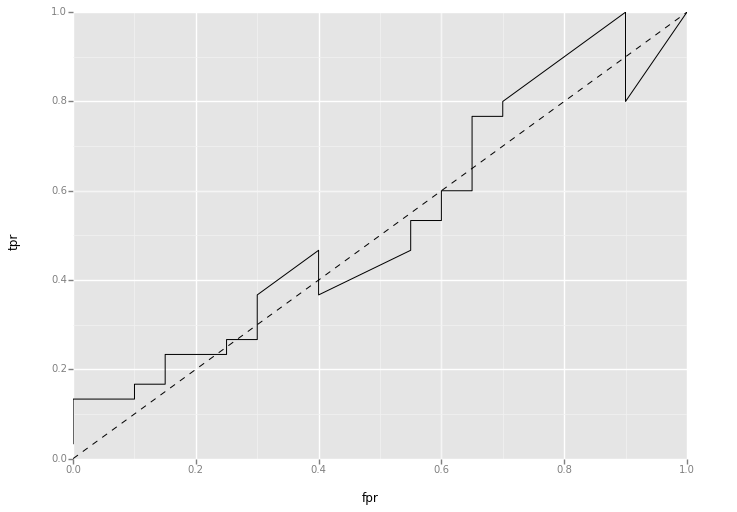

<ggplot: (294710293)>

In [84]:
fpr, tpr,_= metrics.roc_curve(test_target.values, test_lda_probab, pos_label="Up")
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')
    

In [85]:
auc = metrics.auc(fpr,tpr)
print "The area under the ROC curve is: " 
print auc

The area under the ROC curve is: 
0.52


**ROC curve for Quadratic Discriminant Analysis**

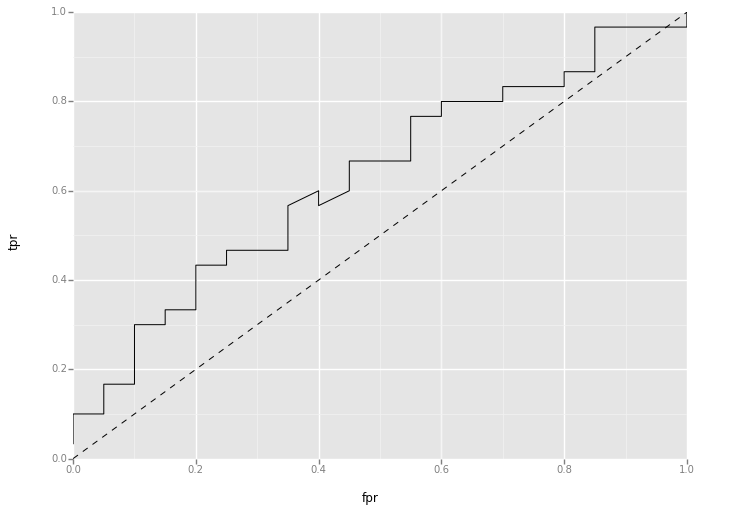

<ggplot: (294316997)>

In [82]:
fpr, tpr,_= metrics.roc_curve(test_target.values, test_qda_probab[:,1], pos_label="Up")
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [83]:
auc = metrics.auc(fpr,tpr)
print "The area under the ROC curve is: " 
print auc

The area under the ROC curve is: 
0.628333333333


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


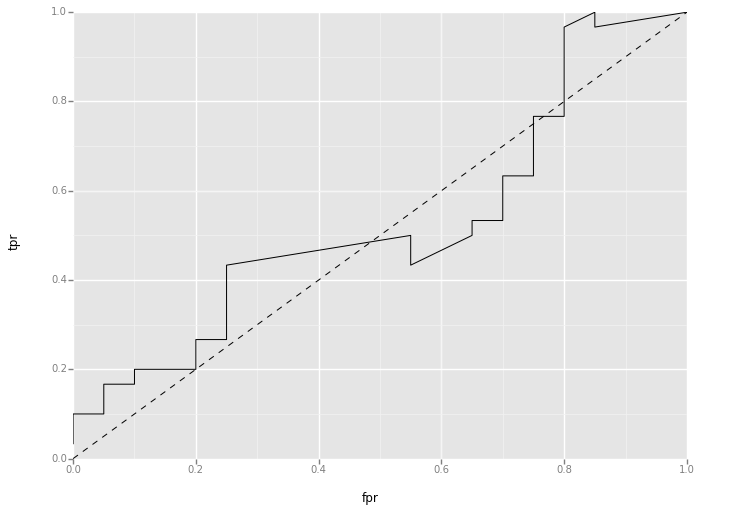

<ggplot: (295184153)>

In [80]:
fpr, tpr,_= metrics.roc_curve(test_target.values, test_gnb_probab[:,1], pos_label="Up")
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')



In [81]:
auc = metrics.auc(fpr,tpr)
print "The area under the ROC curve is: " 
print auc

The area under the ROC curve is: 
0.521666666667


Justify the performance of each model, relative to the others. (1 pts)

As per the score, Gaussian Naive Bayes is the best performing among the above three models. However, as per the AUC, Qudratic Discriminant Analysis is the best performing model. The poor performance of Linear Discriminant Analysis could be due to the fact that it assumes that covariance of each class is identical. This assumption is misleading because the classes are very different from each other.

Repeat steps 1-6, only using the prior 100 points for training. Explain the changes in model performance. (4 pts)

In [55]:
train_data=data[len(data)-150:len(data)-50]
print len(train_data)
test_data=data[len(data)-50:len(data)]
print len(test_data)

## Splitting test and train data into independent set of variables and dependent variable ##

## Train dataset ##
train_variable = train_data[[u'Lag1', u'Lag2', u'Lag3', u'Lag4', u'Lag5']]
#print train_variable[:3]
train_target= train_data[u'Direction']
#print train_target[:3]


## Test dataset ##
test_variable = test_data[[u'Lag1', u'Lag2', u'Lag3', u'Lag4', u'Lag5']]
print test_variable[:3]
test_target= test_data[u'Direction']
print test_target[:3]

100
50
       Lag1   Lag2   Lag3   Lag4   Lag5
1200  1.496 -1.005  0.297  0.827 -0.071
1201 -1.502  1.496 -1.005  0.297  0.827
1202  0.152 -1.502  1.496 -1.005  0.297
1200    Down
1201      Up
1202      Up
Name: Direction, dtype: object


In [72]:
## Linear Discriminant Analysis ##

lda = LDA() 
lda.fit(train_variable, train_target) 
train_lda_probab = lda.predict_proba(train_variable) ## probabilty for train data

test_lda_probab = lda.predict_proba(test_variable) ## probabilty for test data
#test_lda_probab
lda_score = lda.score(test_variable, test_target)
print "Linear Discriminant Analysis Results -"
print lda_score
print test_lda_probab[:5]

## Quadratic Discriminant Analysis ##

qda=QDA()
qda.fit(train_variable, train_target)
train_qda_probab=qda.predict_proba(train_variable)
#len(train_lda_probab)

test_qda_probab = qda.predict_proba(test_variable) ## probabilty for test data
#test_lda_probab
qda_score = qda.score(test_variable, test_target)
print "Quadratic Discriminant Analysis Results -"
print qda_score
print test_qda_probab[:5]

## Naive Bayes ##

gnb = GaussianNB()
gnb.fit(train_variable, train_target)
train_gnb_probab=gnb.predict_proba(train_variable)
#len(train_gnb_probab)

test_gnb_probab = gnb.predict_proba(test_variable) ## probabilty for test data
#test_lda_probab
gnb_score = gnb.score(test_variable, test_target)
print "Naive Bayes Results -"
print gnb_score
print test_gnb_probab[:5]



Linear Discriminant Analysis Results -
0.58
[[ 0.37242945  0.62757055]
 [ 0.50168134  0.49831866]
 [ 0.40116895  0.59883105]
 [ 0.44600499  0.55399501]
 [ 0.61045851  0.38954149]]
Quadratic Discriminant Analysis Results -
0.56
[[ 0.13972539  0.86027461]
 [ 0.891377    0.108623  ]
 [ 0.1165519   0.8834481 ]
 [ 0.00104367  0.99895633]
 [ 0.75361165  0.24638835]]
Naive Bayes Results -
0.54
[[ 0.46940341  0.53059659]
 [ 0.74471137  0.25528863]
 [ 0.25272759  0.74727241]
 [ 0.24959633  0.75040367]
 [ 0.9744747   0.0255253 ]]


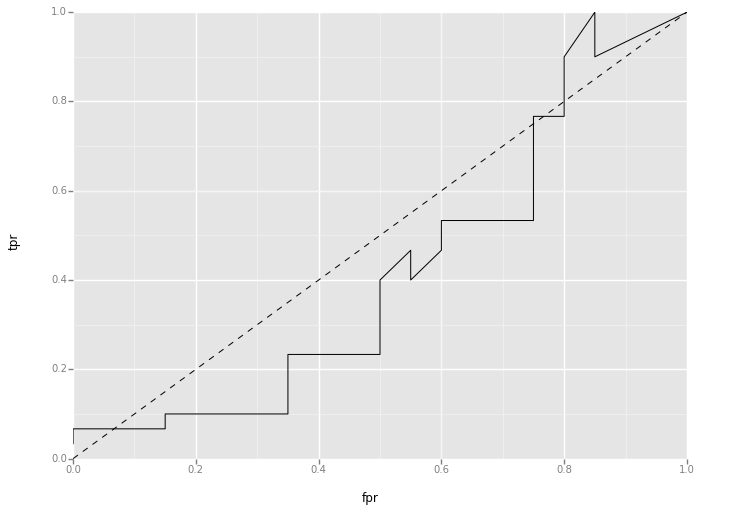

<ggplot: (290098613)>

In [62]:
fpr, tpr,_= metrics.roc_curve(test_target.values, test_lda_probab, pos_label="Up")
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))


ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')   
    

In [63]:
auc = metrics.auc(fpr,tpr)
print "The area under the ROC curve for LDA is: " 
print auc 

The area under the ROC curve for LDA is: 
0.421666666667


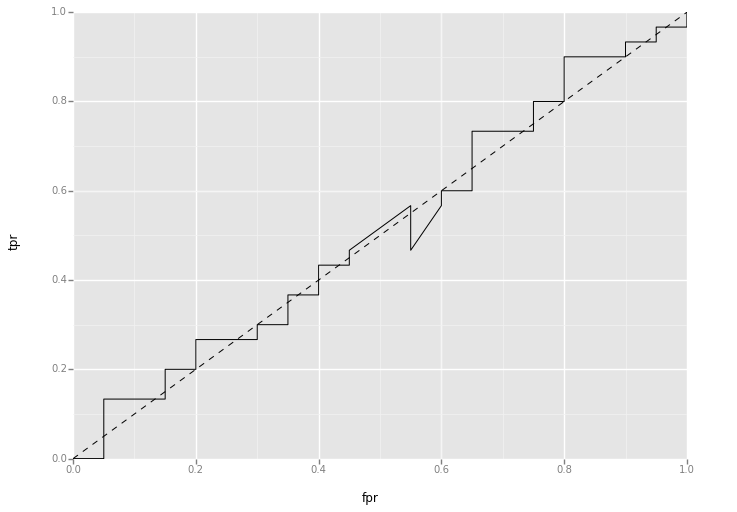

<ggplot: (290136613)>

In [69]:
fpr, tpr,_= metrics.roc_curve(test_target.values, test_qda_probab[:,1], pos_label="Up")
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')
    


In [70]:
auc = metrics.auc(fpr,tpr)
print "The area under the ROC curve for QDA is: " 
print auc

The area under the ROC curve for QDA is: 
0.508333333333


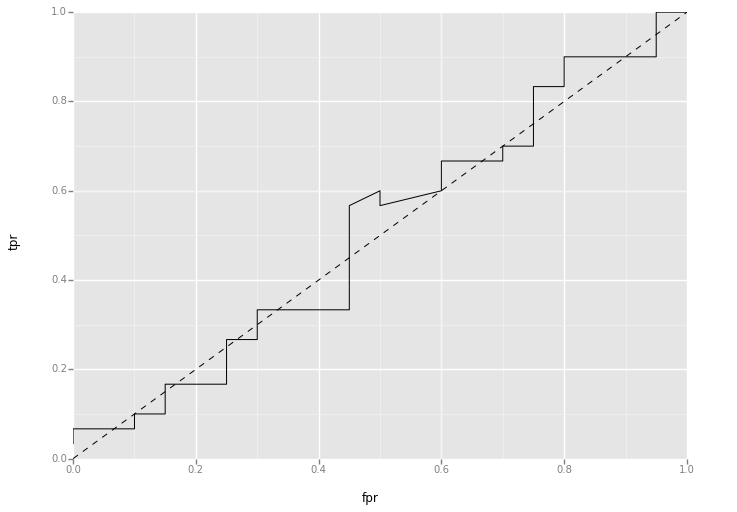

<ggplot: (290136717)>

In [67]:
fpr, tpr,_= metrics.roc_curve(test_target.values, test_gnb_probab[:,1], pos_label="Up")
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))


ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')


In [68]:
auc = metrics.auc(fpr,tpr)
print "The area under the ROC curve for Niave Bayes is: " 
print auc

The area under the ROC curve for Niave Bayes is: 
0.508333333333


Based on the test score, LDA is the best performer followed by QDA and then Gaussian NB. Based on AUC, QDA and Gaussian NB perform equally well followed by LDA. The reason that LDA is a better performing model is in case of smaller dataset, the assumption that LDA holds (i.e. covariances of classes are similar), is much more appropriate. Hence, LDA is performing better than others 

# Question 5 - Logistic Regression (15pts)

In this question we will be predicting mile per gallon (mpg) for Auto data set. ('Auto.csv' in Canvas)
1. Convert mpg to a binary variable mpg01 which is 1 if had an mpg is greater than median mpg and zero otherwise
2. Split the data into training and test. Use 42 as random seed and use 1/3rd of the data for testing. Our y variable is mpg01 and X matrix includes all the other variables except mpg01.
3. Train a logistic regression with almost no regularization (pass l2 (ridge) to penalty and 1,000,000 to the C parameter which is the inverse of regularization strength lambda. This essentially does l2 regularization but applies very little weight to the penalty term) and report the [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) on the test data. Also report the accuracy for the "mpg01 = 0" class, the "mpg01 = 1" class, and the average per-class accuracy on the test data. Average per-class accuracy is described in this [post](http://rasbt.github.io/mlxtend/user_guide/evaluate/scoring/). You can use your confusion matrix to calculate this.
4. Repeat step 3 except use l2 penalty with Cs of [0.001,0.01, 0.1, 1, 10 ,100, 1000]. You will want to use k-fold cross validation to select the best parameter. To evaluate which parameter is best, maximize the average per-class accuracy. To help with this task, check out [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) and how to make your own [custom scorer](http://scikit-learn.org/stable/modules/model_evaluation.html).
5. Repeat question 4 except use l1 instead of l2 as the penalty type, use Cs of  [0.001, 0.01, ..., 1000]
6. Which model produces the best average per-class accuracy? Why do you think this is the case? How do the models handle the different classes, and why is this so?

In [4]:
import pandas as pd
import numpy as np

from sklearn import cross_validation
# from sklearn import model_selection # Use model_selection instead of cross_validation in sklearn version >=0.18
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.grid_search import GridSearchCV

auto_data = pd.read_csv(path+'Auto.csv', na_values='?').drop('name',axis = 1).dropna()
auto_data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


Convert mpg to a binary variable mpg01 which is 1 if had an mpg is greater than median mpg and zero otherwise

In [5]:
median=auto_data["mpg"].median()
print median
auto_data["mpg"]=np.where(auto_data["mpg"]>median, 1,0)
auto_data[:4]

22.75


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,0,8,307.0,130.0,3504,12.0,70,1
1,0,8,350.0,165.0,3693,11.5,70,1
2,0,8,318.0,150.0,3436,11.0,70,1
3,0,8,304.0,150.0,3433,12.0,70,1


Split the data into training and test. Use 42 as random seed and use 1/3rd of the data for testing. Our y variable is mpg01 and X matrix includes all the other variables except mpg01.

In [6]:

formula = 'mpg ~ 0 + cylinders + displacement + horsepower + weight + acceleration + year + origin '
Y, X = dmatrices(formula, auto_data, return_type='dataframe')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


Train a logistic regression with almost no regularization (pass l2 (ridge) to penalty and 1,000,000 to the C parameter which is the inverse of regularization strength lambda. This essentially does l2 regularization but applies very little weight to the penalty term) and report the confusion matrix on the test data. Also report the accuracy for the "mpg01 = 0" class, the "mpg01 = 1" class, and the average per-class accuracy on the test data. Average per-class accuracy is described in this post. You can use your confusion matrix to calculate this.

In [33]:
# instantiate a logistic regression model, and fit with X and Y
model = LogisticRegression(penalty='l2', C=1000000)
model = model.fit(X_train, y_train)

# check the accuracy on the training set
model.score(X_train, y_train)

0.90816326530612246

In [34]:
## Model evaluation by using test data ##

# predict class labels for the test set
predicted = model.predict(X_test)

# generate class probabilities
probs = model.predict_proba(X_test)

# generate evaluation metrics
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

print metrics.confusion_matrix(y_test, predicted)

0.877551020408
0.965067340067
[[45  9]
 [ 3 41]]


**Accuracy for mpg01=1:**
Out of 44 true values for mpg01, 41 were predicted correctly and 3 were inccorrect. So accuracy is 93%

**Accuracy for mpg01=0:**
Out of 54 true values for mpg01, 45 were predicted correctly and 9 were inccorrect. So accuracy is 83%


**Average per class accuracy** = (True positive + True Negative)/ n



In [96]:
avg_class_accuracy=(45.0+41.0)/len(y_test)
print avg_class_accuracy

0.877551020408


In [18]:
cm=metrics.confusion_matrix(y_test, predicted)
print cm
print cm[0][0]
print cm[1][1]

[[45  9]
 [ 3 41]]
45
41


Repeat step 3 except use l2 penalty with Cs of [0.001,0.01, 0.1, 1, 10 ,100, 1000]. You will want to use k-fold cross validation to select the best parameter. To evaluate which parameter is best, maximize the average per-class accuracy. To help with this task, check out GridSearchCV and how to make your own custom scorer.

In [48]:
def custom_scoring(actual_class,predicted_class):
    return np.mean(actual_class == predicted_class)/2

parameters = { 'C':[0.001,0.01, 0.1, 1, 10 ,100, 1000]}
score = make_scorer(custom_scoring, greater_is_better=True)
model2 = LogisticRegression(penalty='l2')
clf = GridSearchCV(model2, parameters, scoring = score)
clf.fit(X_train, y_train["mpg"])


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(custom_scoring), verbose=0)

In [49]:
clf.best_params_

{'C': 0.001}

In [50]:
clf.best_score_

0.4557823129251701

Repeat question 4 except use l1 instead of l2 as the penalty type, use Cs of [0.001, 0.01, ..., 1000]

In [51]:
def custom_scoring(actual_class,predicted_class):
    return np.mean(actual_class == predicted_class)/2

parameters = { 'C':[0.001,0.01, 0.1, 1, 10 ,100, 1000]}
score = make_scorer(custom_scoring, greater_is_better=True)
model2 = LogisticRegression(penalty='l1')
clf = GridSearchCV(model2, parameters, scoring = score)
clf.fit(X_train, y_train["mpg"])

print clf.best_params_
print clf.best_score_

{'C': 0.01}
0.457482993197


Which model produces the best average per-class accuracy? Why do you think this is the case? How do the models handle the different classes, and why is this so?

Model with l2 (ridge) to penalty and 1,000,000 to the C parameter, gives the best average per-class accuracy. However, in case of part-4 and 5, both the regularizations give almost the same accuracy. This is because the number of features is very less so regularization does not have much of an effect. The effect of regularization is visible only when the features are too many. Here, we get the same average accuracy score for both L1 and L2 regularization because for low dimensions, behave similarly.

# Question 6: House Prices (kaggle competition) (25 pts)

In this problem, we are going to explore a kaggle competition: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Your goal is to obtain the best score you can in this competition. This is an ongoing competition, and you have the opportunity to win the prize money! 

The first step is to make a Kaggle account. Then find the House Prices competition and read the competition details and the description of the dataset. You may find this [article](https://ww2.amstat.org/publications/jse/v19n3/decock.pdf) useful.

Your work should meet the following requirements:

1. Data Preprocessing. 
 * Conduct some data preprocessing. (Hint: see if there is any skewed features and consider applying suitable transformation techniques to make them more "normal").
 * Impute the missing values (if any).
2. Predictive Models. 
 * You have to create at least three models: simple linear regression, Lasso and Ridge regression and multilayer perceptron. You may consider creating an ensemble of these models as well (optional). For Lasso and Ridge regression, optimize the alphas using cross validation. You may try other predictive models to get better scores (optional).
3. Evaluation: submit your model to kaggle submission site and report the public score.

Briefly describe your work on each of these steps. Explain (very briefly) what approaches you tried, what worked and what did not work. Mention your team's kaggle name and include a screen shot of your public submission score. Finally, try your best to win this competition!

In [178]:
# Reading data #
train=pd.read_csv(path+"kaggle/train.csv")
test=pd.read_csv(path+"kaggle/test.csv")

# Concatenating test and train ##
data_combined = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']))


***Data Preprocessing***

In [179]:
# Removing columns with >1000 missing values
for col in data_combined.columns.values:
    if np.sum(data_combined[col].isnull()) > 1000:
        data_combined = data_combined.drop(col, axis = 1)


In [181]:
## Check for skewness ##
# Checking skewness in predictors (threshold = 0.5)
numeric_feats = data_combined.dtypes[data_combined.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.5]
skewed_feats = skewed_feats.index

#log transform skewed numeric features
data_combined[skewed_feats] = np.log1p(data_combined[skewed_feats])

data_combined[:5]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,SC60,RL,4.189655,9.042040,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,4.127134,0.000000,0.0,0.0,0.0,0.0,Feb,2008,WD,Normal
1,SC20,RL,4.394449,9.169623,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.000000,0.000000,0.0,0.0,0.0,0.0,May,2007,WD,Normal
2,SC60,RL,4.234107,9.328212,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,3.761200,0.000000,0.0,0.0,0.0,0.0,Sep,2008,WD,Normal
3,SC70,RL,4.110874,9.164401,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,3.583519,5.609472,0.0,0.0,0.0,0.0,Feb,2006,WD,Abnorml
4,SC60,RL,4.442651,9.565284,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,4.442651,0.000000,0.0,0.0,0.0,0.0,Dec,2008,WD,Normal


In [182]:
## Treating dummy variables ##
data_combined_dummy = pd.get_dummies(data_combined)

# Imputing missing values with the median of that column
data_combined_dummy = data_combined_dummy.fillna(data_combined_dummy.median())

# Creating matrices for model building:
X_train = data_combined_dummy[:train.shape[0]]
X_test = data_combined_dummy[train.shape[0]:]
y = train.SalePrice

# Scaling the numeric features
stdSc = StandardScaler()
X_train.loc[:, numeric_feats] = stdSc.fit_transform(X_train.loc[:, numeric_feats])
X_test.loc[:, numeric_feats] = stdSc.transform(X_test.loc[:, numeric_feats])

X_train[:5]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.070826,-0.133270,0.651479,-0.460408,1.050994,0.878668,1.203619,0.779431,-0.355342,-0.340511,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.581263,0.113413,-0.071836,1.948163,0.156734,-0.429577,-0.806841,0.888257,-0.355342,0.002218,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.070714,0.420049,0.651479,-0.460408,0.984752,0.830215,1.131524,0.654803,-0.355342,0.230372,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.321673,0.103317,0.651479,-0.460408,-1.863632,-0.720298,-0.806841,0.384539,-0.355342,0.348034,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.734744,0.878431,1.374795,-0.460408,0.951632,0.733308,1.423411,0.754400,-0.355342,0.295711,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [183]:
## check for correlation between predictors and sales price ##
num_feat = train.dtypes[train.dtypes != "object"].index
train_numeric = train[num_feat]
corr = abs(train_numeric.corr()['SalePrice'])
corr = corr.iloc[:-1] # removing salesprice
corr = corr[corr>.5]
print corr

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
Name: SalePrice, dtype: float64


In [184]:
## check for correlation among variables ##
corr_data=data_combined.corr()
corr_list=[]
for variable1 in corr_data.index:
    for variable2 in corr_data.index:
        if corr_data[variable1][variable2] > 0.6 and variable1!=variable2:
            l1=[variable1, variable2, corr_data[variable1][variable2]]
            l2=[variable2, variable1, corr_data[variable1][variable2]]
            #print l
            if l2 not in corr_list:
                corr_list.append(l1)
corr_list

[['LotFrontage', 'LotArea', 0.76530130997596246],
 ['OverallQual', 'GarageCars', 0.60074366378852806],
 ['YearBuilt', 'YearRemodAdd', 0.61223456975565682],
 ['YearBuilt', 'GarageYrBlt', 0.8348123731631012],
 ['YearRemodAdd', 'GarageYrBlt', 0.65236522319100199],
 ['GrLivArea', 'FullBath', 0.65229352499029258],
 ['GrLivArea', 'TotRmsAbvGrd', 0.81008200054670465],
 ['BedroomAbvGr', 'TotRmsAbvGrd', 0.67629911103607032],
 ['GarageCars', 'GarageArea', 0.88970041468584482]]

In [185]:
## Taking into account correlation results from above following predcitors are shortlisted for the model ##
                 
predictors=[u'OverallQual',  u'TotalBsmtSF',u'GarageArea',u'YearBuilt', u'YearRemodAdd',u'1stFlrSF',
            u'FullBath', u'GrLivArea','LotFrontage']

**Simple Linear Regression**

In [217]:
# Running it on the subsetted train dataset
model = LinearRegression()
model.fit(X_train[predictors], y)

# Getting the predictions
predictions = model.predict(X_test[predictors])
df1 = pd.DataFrame({'Id': test["Id"],'SalePrice':predictions})
df1.to_csv(path+"kaggle/linreg2.csv", index=False)

print "The RMSE obtained on the Kaggle leaderboard was: ", 0.269

The RMSE obtained on the Kaggle leaderboard was:  0.269


**Lasso Regression**

In [188]:
lassocv = LassoCV(cv=10,normalize=True)
lassocv.fit(X_train, y)

print "Best Alpha from lasso: " + str(lassocv.alpha_), "\n"

Best Alpha from lasso: 21.7323259963 



In [199]:
predictions = lassocv.predict(X_test)
df1 = pd.DataFrame({'Id': test["Id"],'SalePrice':predictions})
df1.to_csv(path+"kaggle/lasso1.csv", index=False)


print "The RMSE obtained on the Kaggle leaderboard was: ", 0.219

The RMSE obtained on the Kaggle leaderboard was:  0.219


Lasso picked 100 features and eliminated the other 196 features


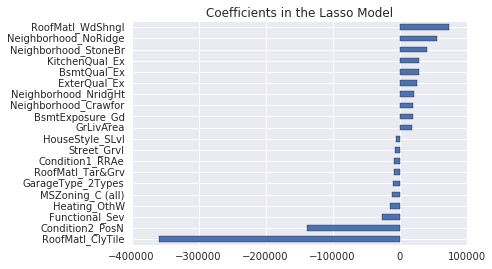

In [197]:
# Plot important coefficients
coefs = pd.Series(lassocv.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

**Ridge Regression**

In [200]:
ridgecv = RidgeCV(cv=10,normalize=True)
ridgecv.fit(X_train, y)

print "Best Alpha from ridge: " + str(ridgecv.alpha_), "\n"

Best Alpha from ridge: 10.0 



In [205]:
# Ridge predictions on test
predictions = ridgecv.predict(X_test)

df1 = pd.DataFrame({'Id': test["Id"],'SalePrice':predictions})
df1.to_csv(path+"kaggle/ridge1.csv", index=False)

print "The RMSE obtained on the Kaggle leaderboard was: ", 0.212

The RMSE obtained on the Kaggle leaderboard was:  0.212


Ridge picked 295 features and eliminated the other 1 feature


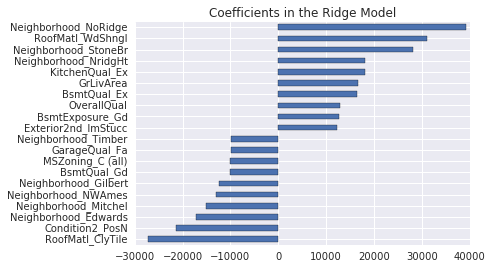

In [206]:
# Plot important coefficients
coefs = pd.Series(ridgecv.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " feature")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

**Multilayer Perceptron **

In [211]:
# Setting up the model
parameters = {'solver':('lbfgs','sgd','adam'),'activation':('logistic','tanh'),'alpha':[0.1,0.01,0.001,0.0001]}
mlp_regressor = MLPRegressor(hidden_layer_sizes=(592,),max_iter=500)

In [212]:
# Optimizing parameters
grid_search_model = GridSearchCV(mlp_regressor,parameters)

In [213]:
grid_search_model.fit(X_train,y)

/Users/nikitalakhotia/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


GridSearchCV(cv=None, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(592,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001], 'activation': ('logistic', 'tanh'), 'solver': ('lbfgs', 'sgd', 'adam')},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [214]:
grid_search_model.best_params_

{'activation': 'logistic', 'alpha': 0.0001, 'solver': 'lbfgs'}

In [216]:
# MLP predictions on test
predictions = grid_search_model.predict(X_test)
df1 = pd.DataFrame({'Id': test["Id"],'SalePrice':predictions})
df1.to_csv(path+"kaggle/mlp1.csv", index=False)

print "The RMSE obtained on the Kaggle leaderboard was: ", 0.177

The RMSE obtained on the Kaggle leaderboard was:  0.177


In [218]:
## Ensemble of above model##
print "The RMSE obtained on the Kaggle leaderboard was: ", 0.152

The RMSE obtained on the Kaggle leaderboard was:  0.152


For ensemble method, average of predictions from all the above models were taken. The ensemble performed the best among all the above methods.


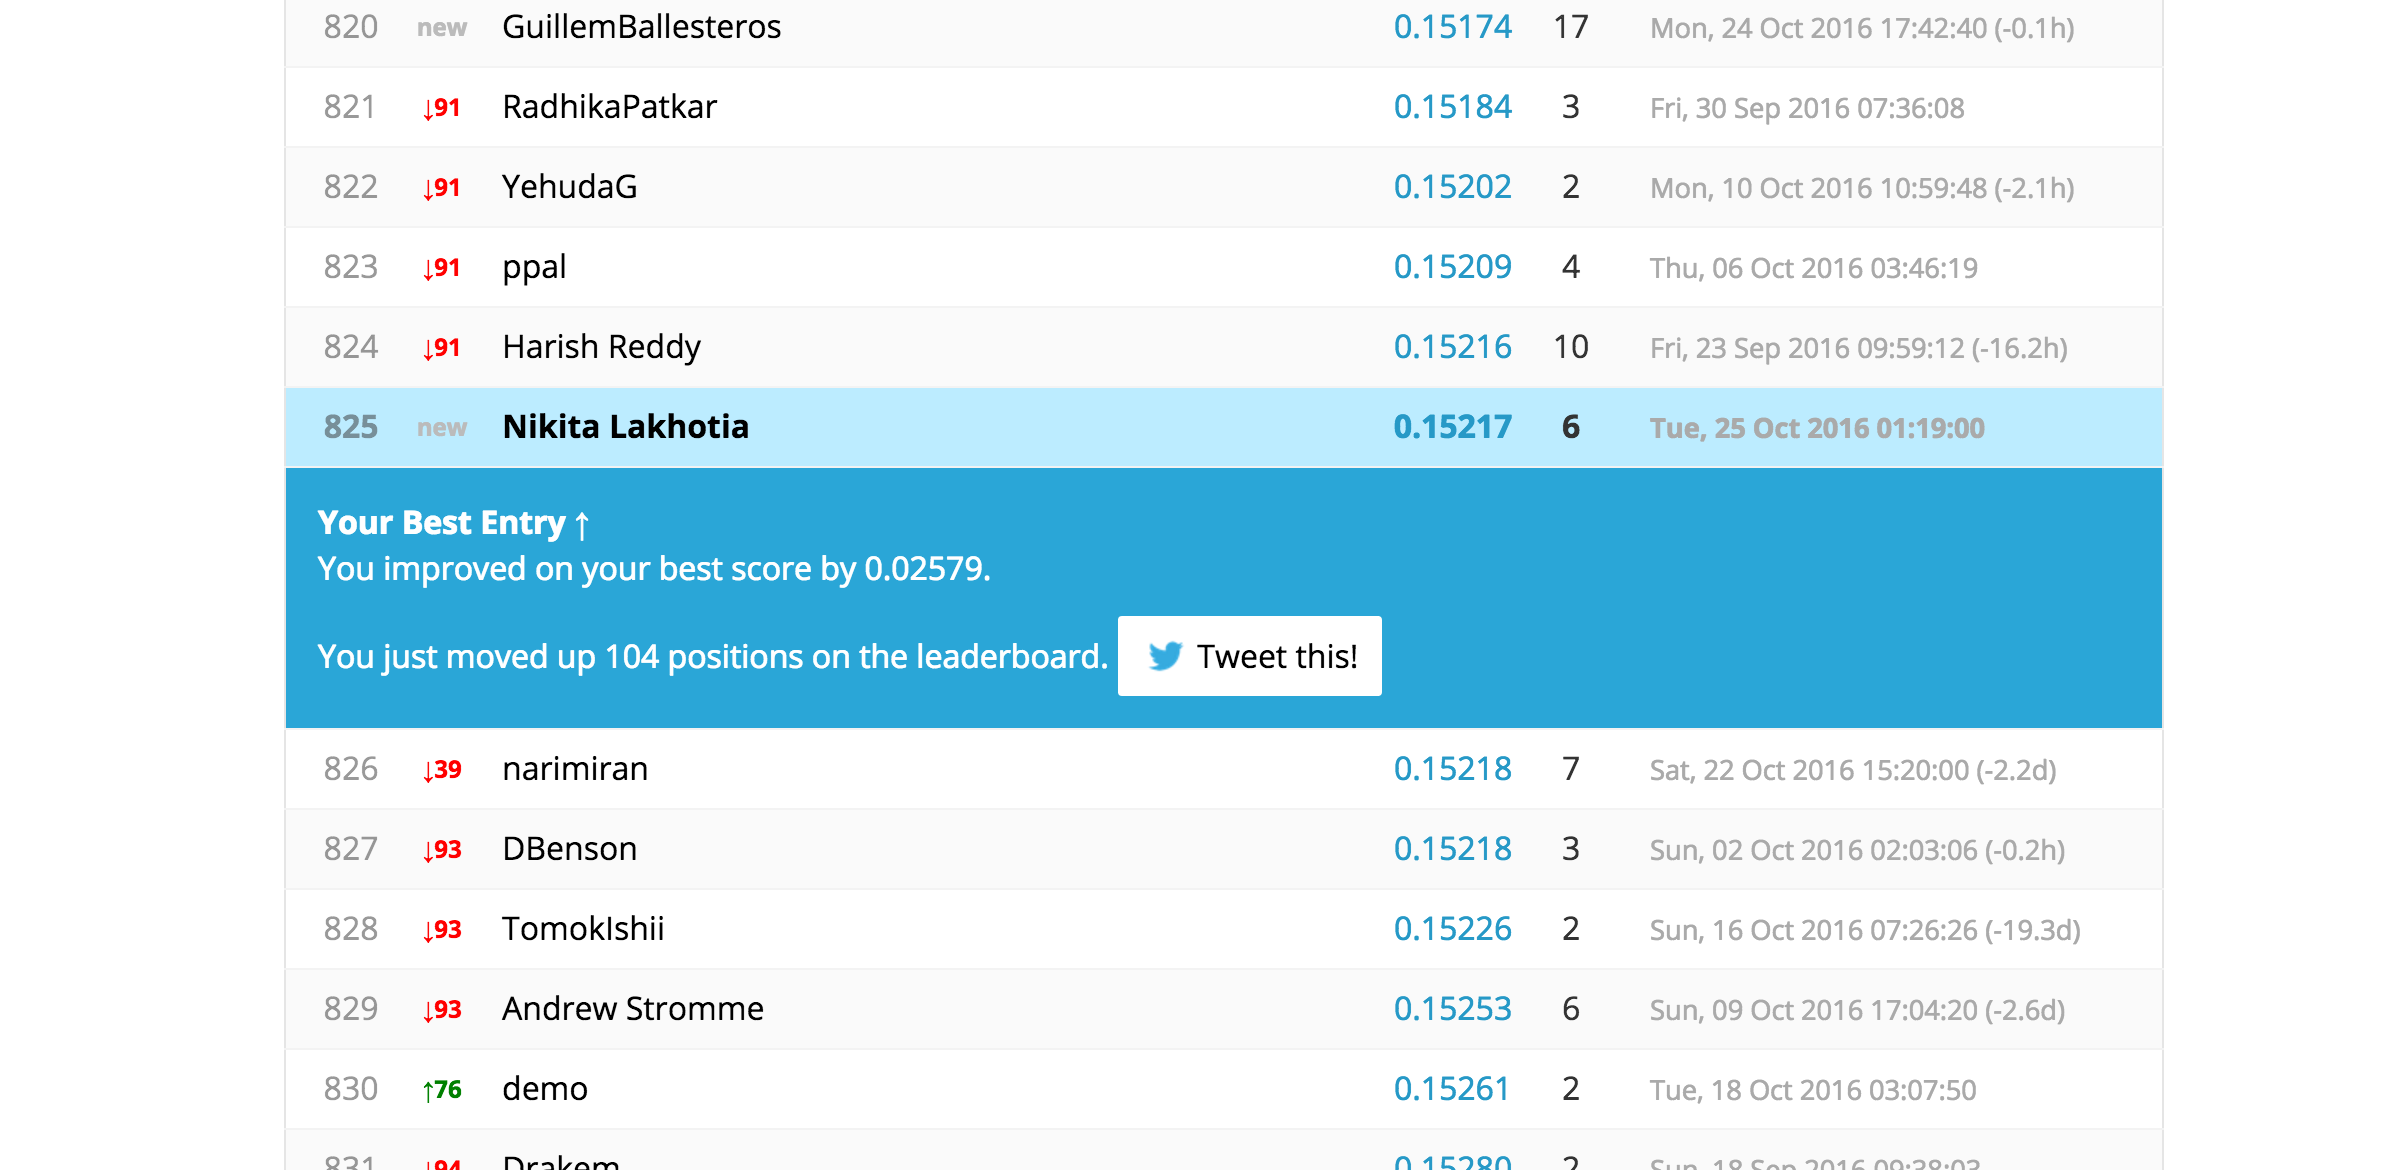

In [219]:
from IPython.display import Image
Image(filename='/Users/nikitalakhotia/Desktop/Leaderboard.png')